In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout,Flatten,Activation
from tensorflow.keras import activations

## Read in data

In [3]:
btc_path = os.path.abspath("result_BTC.csv")
eth_path = os.path.abspath("result_ETH.csv")
bnb_path = os.path.abspath("result_BNB.csv")
btc_data=pd.read_csv(btc_path)
eth_data=pd.read_csv(eth_path)
bnb_data=pd.read_csv(bnb_path)

## Process BTC data

In [8]:
data = btc_data['close']
close_train=data.iloc[:len(data)-260]          
close_test=data.iloc[len(close_train):]     
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)  

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))               
close_scaled=scaler.fit_transform(close_train)    

timestep=24
x_train=[]
y_train=[]
for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)                       
print("y_train shape= ",y_train.shape)  

x_train shape=  (25957, 24, 1)
y_train shape=  (25957,)


## LSTM model for BTC

In [9]:
model=Sequential()
model.add(LSTM(200,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.1,shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
731/731 [==============================] - 45s 59ms/step - loss: 4.9040e-04 - val_loss: 7.0692e-04
Epoch 2/30
731/731 [==============================] - 43s 59ms/step - loss: 6.1299e-06 - val_loss: 8.2519e-04
Epoch 3/30
731/731 [==============================] - 44s 60ms/step - loss: 5.2864e-06 - val_loss: 4.9214e-04
Epoch 4/30
731/731 [==============================] - 44s 60ms/step - loss: 4.4449e-06 - val_loss: 3.9593e-04
Epoch 5/30
731/731 [==============================] - 44s 60ms/step - 

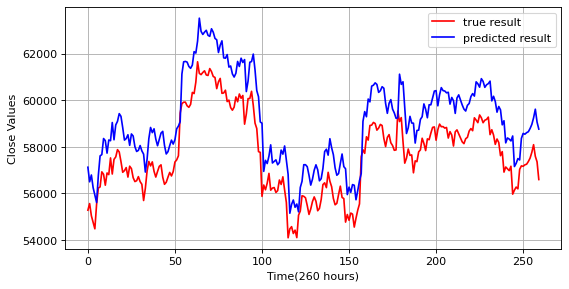

In [10]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(260 hours)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [11]:
test_series = pd.Series(data_test.flatten().tolist())
predicted_series = pd.Series(predicted_data.flatten().tolist())
print(test_series.corr(predicted_series))

0.9636405123610075


## Process ETH data

In [4]:
data = eth_data['close']
close_train=data.iloc[:len(data)-260]          
close_test=data.iloc[len(close_train):]     
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)  
 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))               
close_scaled=scaler.fit_transform(close_train)         
close_scaled.shape

timestep=24
x_train=[]
y_train=[]
for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)                       
print("y_train shape= ",y_train.shape)     

x_train shape=  (25957, 24, 1)
y_train shape=  (25957,)


## LSTM model for ETH

In [5]:
model=Sequential()
model.add(LSTM(200,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_split=0.1,shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
731/731 [==============================] - 47s 60ms/step - loss: 6.5338e-04 - val_loss: 3.4602e-04
Epoch 2/30
731/731 [==============================] - 44s 60ms/step - loss: 1.0824e-05 - val_loss: 0.0019
Epoch 3/30
731/731 [==============================] - 44s 60ms/step - loss: 9.3855e-06 - val_loss: 1.7786e-04
Epoch 4/30
731/731 [==============================] - 44s 60ms/step - loss: 7.6074e-06 - val_loss: 8.2804e-04
Epoch 5/30
731/731 [==============================] - 44s 60ms/step - loss: 

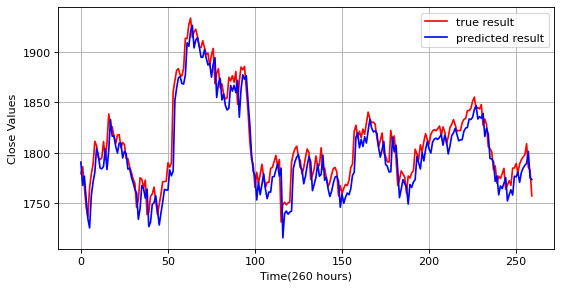

In [6]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(260 hours)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [7]:
test_series = pd.Series(data_test.flatten().tolist())
predicted_series = pd.Series(predicted_data.flatten().tolist())
print(test_series.corr(predicted_series))

0.9511226339393797


## Process BNB Data

In [12]:
data = bnb_data['close']
close_train=data.iloc[:len(data)-260]          
close_test=data.iloc[len(close_train):]     
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)  
close_train.shape   

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))               
close_scaled=scaler.fit_transform(close_train)         
close_scaled.shape

timestep=24
x_train=[]
y_train=[]
for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
print("x_train shape= ",x_train.shape)                       
print("y_train shape= ",y_train.shape)                     

x_train shape=  (25957, 24, 1)
y_train shape=  (25957,)


## LSTM model for BNB

In [13]:
model=Sequential()
model.add(LSTM(200,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()
model.fit(x_train,y_train,epochs=40,batch_size=32,validation_split=0.1,shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
731/731 [==============================] - 45s 60ms/step - loss: 1.0814e-04 - val_loss: 0.0038
Epoch 2/40
731/731 [==============================] - 44s 60ms/step - loss: 2.2297e-06 - val_loss: 0.0040
Epoch 3/40
731/731 [==============================] - 43s 59ms/step - loss: 1.4889e-06 - val_loss: 0.0038
Epoch 4/40
731/731 [==============================] - 44s 60ms/step - loss: 1.5701e-06 - val_loss: 0.0021
Epoch 5/40
731/731 [==============================] - 43s 59ms/step - loss: 1.1651e-06

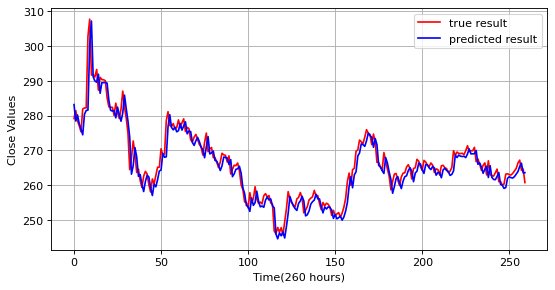

In [16]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(260 hours)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

In [15]:
test_series = pd.Series(data_test.flatten().tolist())
predicted_series = pd.Series(predicted_data.flatten().tolist())
print(test_series.corr(predicted_series))

0.9560943010241799
